# Time- and zonal- mean layer thicknesses and meridional volume transport

This notebook is converted from plt_h_rho_vh_rho.py, which visualizes the time- and zonal-mean layer thicknesses (h_rho) and meridional volume transport (vh_rho) in pure potential density coordinates.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog_rho.nc','r')

In [3]:
xq = data.variables['xq'][:]        # uh_rho
yh = data.variables['yh'][:]        # uh_rho,h_rho
xh = data.variables['xh'][:]        # vh_rho,h_rho
yq = data.variables['yq'][:]        # vh_rho
zl = data.variables['zl'][:]

In [4]:
h_rho4  = data.variables['h_rho'][:,:,:,:]
vh_rho4 = data.variables['vh_rho'][:,:,:,:]
vh_rho4 = vh_rho4.filled(np.nan)

In [5]:
# time-mean
h_rho3  = np.nanmean(h_rho4,axis=0)
vh_rho3 = np.nanmean(vh_rho4,axis=0)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
# zonal-sum for transport, zonal-mean for layer thicknesses
h_rho2  = np.nanmean(h_rho3,axis=-1)
vh_rho2 = np.nansum(vh_rho3,axis=-1)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


In [7]:
h_rho2[h_rho2<2.5]=np.nan
vh_rho2[np.isnan(h_rho2)==True]=np.nan

In [8]:
h_sum   = np.nansum(h_rho2,axis=0)
print h_sum

[   46.94960785   148.59049988   248.58720398   347.53689575   448.9156189
   548.23510742   648.40368652   748.95391846   848.05529785   948.73736572
  1048.72741699  1147.91638184  1248.62487793  1346.07775879  1446.50488281
  1545.82055664  1646.70300293  1745.77539062  1843.76696777  1940.07385254
  2037.44824219  2131.40722656  2223.16455078  2312.60375977  2401.68481445
  2488.55981445  2572.56176758  2656.68847656  2745.95361328  2826.0546875
  2901.87280273  2974.23632812  3049.10253906  3121.80249023  3193.81689453
  3269.40600586  3343.06713867  3414.46606445  3482.84472656  3544.72631836
  3575.91113281  3583.22973633  3588.82788086  3592.33837891  3593.72509766
  3595.83544922  3594.63110352  3592.32250977  3589.40185547  3586.37841797
  3583.72143555  3581.79858398  3580.8347168   3580.97583008  3582.23681641
  3584.40893555  3586.89404297  3592.86962891  3597.11889648  3601.30004883
  3605.13964844  3608.42114258  3610.97363281  3612.6875      3613.55615234
  3613.5898437

In [9]:
%matplotlib inline

Plot layer thicknesses:

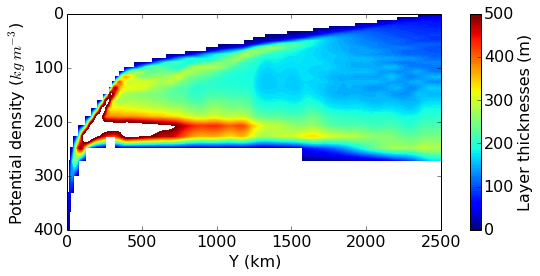

In [10]:
plt.figure(1,figsize=(8,5))

h_level = np.arange(0,500+5,5)
h_ticks = np.arange(0,500+100,100)

pc = plt.contourf(yh,zl,h_rho2,cmap=plt.cm.jet,levels=h_level)
cb = plt.colorbar(pc,ticks=h_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,400.0])
plt.gca().set_yticks(np.arange(0,400 + 100,100))
plt.gca().set_yticklabels(['0','100','200','300','400'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Layer thicknesses (m)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v33_h_rho_y50.png',dpi=600)

plt.show()

Plot volume transport:

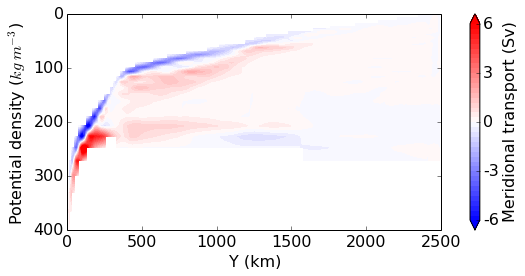

In [12]:
plt.figure(2,figsize=(8,5))

vh_level = np.arange(-6.0e+6,6.0e+6+0.3e+6,0.3e+6)
vh_ticks = np.arange(-6.0e+6,6.0e+6+3e+6,3e+6)

pc = plt.contourf(yq,zl,vh_rho2,cmap=plt.cm.bwr,levels=vh_level,extend='both')
cb = plt.colorbar(pc,ticks=vh_ticks)
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,400.0])
plt.gca().set_yticks(np.arange(0,400 + 100,100))
plt.gca().set_yticklabels(['0','100','200','300','400'])
plt.gca().invert_yaxis()
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.ax.set_yticklabels(['-6','-3','0','3','6'])
cb.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Potential density ($kg\ m^{-3}$)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v33_vh_rho_y50.png',dpi=600)

plt.show()